### Auto Regressive Model (AR) Model

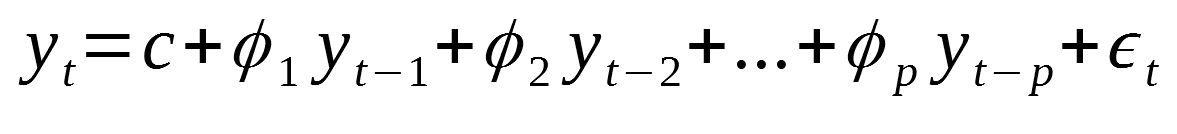

Relies on past period values to predict the current period values.

It's a linear model, where current period values are the sum of past outcomes multiplied by a numeric factor.

**\[EQN\] xt = C + fi * xt-1 + eplison_t** (for lag=1)

> Where:
  - **xt-1** is the value of x at previous period.
  - **fi** is any numeric constant between (-1,1) by which we multiply the lagged value, iow how much of the previos knowledge 
    we want to include in predicting the current value.
  - **epsilon_t** is the residual, means the diffenence b/w actual value and the predicted value. (unpredictable shocks)
  


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

In [88]:
raw_csv_data = pd.read_csv("013 IndexE8.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date,dayfirst=True)
df_comp.set_index("date",inplace=True)
df_comp = df_comp.asfreq("b")
df_comp = df_comp.fillna(method="ffill")

In [89]:
df_comp['market_value'] = df_comp.ftse

In [90]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

#### The ACF

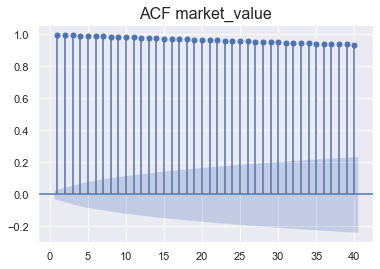

In [91]:
sgt.plot_acf(df.market_value,lags=40,zero=False)
plt.title("ACF market_value",size=16)
plt.show()

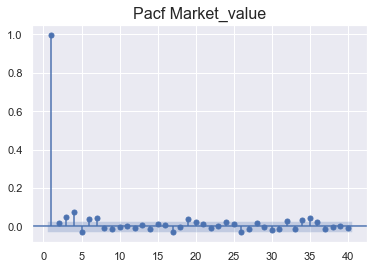

In [92]:
sgt.plot_pacf(df.market_value,lags=40,zero=False,alpha=0.05,method=('ols'))
plt.title("Pacf Market_value",size=16)
plt.show()

In [93]:
model_ar = ARMA(df.market_value,order=(1,0))
results_ar = model_ar.fit()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [94]:
#AR(1)
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.603
Method:                       css-mle   S.D. of innovations             59.258
Date:                Fri, 02 Apr 2021   AIC                          55251.205
Time:                        14:20:36   BIC                          55270.769
Sample:                    01-07-1994   HQIC                         55258.061
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5087.1410    482.201     10.550      0.000    4142.043    6032.238
ar.L1.market_value     0.9985      0.001   1295.142      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0016           +0.0000j            1.0016            0.0000
-----------------------------------------------------------------------------
"""

In [95]:
#AR(2)

model_ar_2 = ARMA(df.market_value,order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.868
Method:                       css-mle   S.D. of innovations             59.249
Date:                Fri, 02 Apr 2021   AIC                          55251.736
Time:                        14:20:38   BIC                          55277.821
Sample:                    01-07-1994   HQIC                         55260.876
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5005.0537    498.580     10.039      0.000    4027.856    5982.252
ar.L1.market_value     0.9814      0.014     69.596      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4487           +0.0000j           58.4487            0.5000
-----------------------------------------------------------------------------
"""

In [96]:
#AR(3)

model_ar_3 = ARMA(df.market_value,order=(3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27616.078
Method:                       css-mle   S.D. of innovations             59.180
Date:                Fri, 02 Apr 2021   AIC                          55242.155
Time:                        14:20:39   BIC                          55274.762
Sample:                    01-07-1994   HQIC                         55253.581
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5385.7509    693.472      7.766      0.000    4026.571    6744.931
ar.L1.market_value     0.9806      0.014     69.643      0.000       0.953       1.008
ar.L2.market_value    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0490      0.014      3.470      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0012           -0.0000j            1.0012           -0.0000
AR.2           -0.1854           -4.5133j            4.5171           -0.2565
AR.3           -0.1854           +4.5133j            4.5171            0.2565
-----------------------------------------------------------------------------
"""

In [97]:
#AR(4)

model_ar_4 = ARMA(df.market_value,order=(4,0))
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.754
Method:                       css-mle   S.D. of innovations             59.023
Date:                Fri, 02 Apr 2021   AIC                          55217.508
Time:                        14:20:41   BIC                          55256.636
Sample:                    01-07-1994   HQIC                         55231.219
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5390.8733    753.196      7.157      0.000    3914.637    6867.110
ar.L1.market_value     0.9770      0.014     69.532      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.256      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.169      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           -0.0000j            1.0010           -0.0000
AR.2            0.9546           -2.0879j            2.2958           -0.1818
AR.3            0.9546           +2.0879j            2.2958            0.1818
AR.4           -2.6030           -0.0000j            2.6030           -0.5000
-----------------------------------------------------------------------------
"""

In [98]:
# Now to know how including more lags is benefiting the model we use log likelihood test, (greater is better)

In [99]:
# LLR Test
def LLR_test(mod_1,mod_2, df=1):
    l1 = mod_1.fit().llf
    l2 = mod_2.fit().llf
    LR = (2*(l2-l1))
    p = chi2.sf(LR,df).round(3)
    return p

In [100]:
# Comparing Higher-Lag AR Models

In [101]:
LLR_test(model_ar_2,model_ar_3) # it shows significant results

0.001

In [102]:
print(results_ar_4.summary())
print(LLR_test(model_ar_3,model_ar_4))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.754
Method:                       css-mle   S.D. of innovations             59.023
Date:                Fri, 02 Apr 2021   AIC                          55217.508
Time:                        14:20:44   BIC                          55256.636
Sample:                    01-07-1994   HQIC                         55231.219
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5390.8733    753.196      7.157      0.000    3914.637    6867.110
ar.L1.market_value     0.9770      0.014     69.532      0.000       0.949       1.005
ar.L2.market_value  

In [103]:
for i in range(2,11):
    m_i = ARMA(df.market_value,order=(i,0))
    
    m_i_plus_1 = ARMA(df.market_value,order=(i+1,0))
    
    llr_result = LLR_test(m_i,m_i_plus_1)
    
    if llr_result < 0.05:
        print(f"LLR Statistic for lags {i} and {i+1} is : {llr_result:5}  [SIGNIFICANT]" )
    else:
        print(f"LLR Statistic for lags {i} and {i+1} is : {llr_result:5}  [NOT SIGNIFICANT]")
                
# [It shows that lags upto 7 is meaningful]

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


LLR Statistic for lags 2 and 3 is : 0.001  [SIGNIFICANT]
LLR Statistic for lags 3 and 4 is :   0.0  [SIGNIFICANT]
LLR Statistic for lags 4 and 5 is : 0.028  [SIGNIFICANT]
LLR Statistic for lags 5 and 6 is : 0.005  [SIGNIFICANT]
LLR Statistic for lags 6 and 7 is : 0.002  [SIGNIFICANT]
LLR Statistic for lags 7 and 8 is : 0.571  [NOT SIGNIFICANT]
LLR Statistic for lags 8 and 9 is : 0.288  [NOT SIGNIFICANT]
LLR Statistic for lags 9 and 10 is : 0.792  [NOT SIGNIFICANT]
LLR Statistic for lags 10 and 11 is : 0.882  [NOT SIGNIFICANT]


In [104]:
#AR(7)

model_ar_7 = ARMA(df.market_value,order=(7,0))
results_ar_7 = model_ar_7.fit()

LLR_test(model_ar,model_ar_7,df=6)

0.0

In [105]:
## AR models works best for stationary processes
# previously we saw the s&p price followed the random walk pattern.
# Now let's see the ftse also follows the same

In [106]:
import statsmodels.tsa.stattools as sts

sts.adfuller(df.market_value) 

# [It shows p value (0.33) greater than the significance level hence, we can't conclusively say 
# that the data comes from a stationary process]

# therefore we can say it comes from a non stationary process, this suggest we shouldn't rely on AR models for forecasts.

# So incase we want to apply AR models, we have to transform the data so that is follows "stationary" assumptions.

# In financial terms it's better to use returns than prices

# "Returns" mean the percentage change between the values of two consecutive periods

(-1.9041551418836873,
 0.330108932770283,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

In [107]:
# r = Returns, r > 0 positive returns and vice-versa

# Create returns out of prices: ((Pt - Pt-1)/pt-1)*100

In [108]:
df["returns"] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]
df.head()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,market_value,returns
date,,
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166
1994-01-14,3400.56,1.206842


In [109]:
# Now again dickey-fuller test on "returns"
sts.adfuller(df.returns)

# Now the data follows the stationary assumptions

(-12.770265719497202,
 7.798058336039616e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.7672456975)

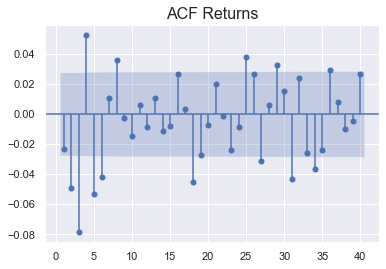

In [110]:
# Plotting ACF & PACF
sgt.plot_acf(df.returns,zero=False,lags=40)
plt.title("ACF Returns",size=16)
plt.show()

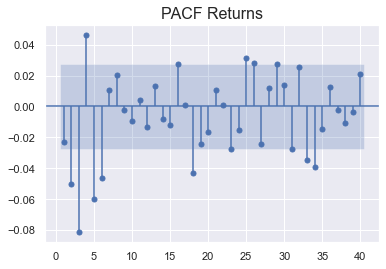

In [111]:
sgt.plot_pacf(df.returns,zero=False,lags=40,method=('ols'))
plt.title("PACF Returns",size=16)
plt.show()

In [112]:
###

model_ret_ar_1 = ARMA(df.returns,order=(1,0))
results_ret_ar_1 = model_ret_ar_1.fit()
results_ret_ar_1.summary()

# The p_value is 0.103 which is greater than the significane level, This model has no predictive power.

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Fri, 02 Apr 2021   AIC                          15865.497
Time:                        14:21:44   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4386           +0.0000j           43.4386            0.5000
-----------------------------------------------------------------------------
"""

In [113]:
model_ret_ar_2 = ARMA(df.returns,order=(2,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Fri, 02 Apr 2021   AIC                          15854.911
Time:                        14:21:44   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

In [114]:
print(LLR_test(model_ret_ar_1,model_ret_ar_2))

0.0


In [115]:
model_ret_ar_3 = ARMA(df.returns,order=(3,0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7906.738
Method:                       css-mle   S.D. of innovations              1.169
Date:                Fri, 02 Apr 2021   AIC                          15823.477
Time:                        14:21:45   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.330      0.184      -0.009       0.047
ar.L1.returns    -0.0283      0.014     -2.011      0.044      -0.056      -0.001
ar.L2.returns    -0.0521      0.014     -3.705      0.000      -0.080      -0.025
ar.L3.returns    -0.0815      0.014     -5.792      0.000      -0.109      -0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9233           -2.0210j            2.2219           -0.1818
AR.2            0.9233           +2.0210j            2.2219            0.1818
AR.3           -2.4855           -0.0000j            2.4855           -0.5000
-----------------------------------------------------------------------------
"""

In [116]:
print(LLR_test(model_ret_ar_2,model_ret_ar_3))

0.0


In [117]:
model_ret_ar_5 = ARMA(df.returns,order=(5,0))
results_ret_ar_5 = model_ret_ar_5.fit()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [127]:
model_ret_ar_7 = ARMA(df.returns,order=(7,0))
results_ret_ar_7 = model_ret_ar_7.fit()
results_ret_ar_7.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.647
Method:                       css-mle   S.D. of innovations              1.164
Date:                Fri, 02 Apr 2021   AIC                          15791.294
Time:                        22:20:58   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.399      0.162      -0.008       0.045
ar.L1.returns    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.returns    -0.0517      0.014     -3.663      0.000      -0.079      -0.024
ar.L3.returns    -0.0874      0.014     -6.202      0.000      -0.115      -0.060
ar.L4.returns     0.0433      0.014      3.064      0.002       0.016       0.071
ar.L5.returns    -0.0601      0.014     -4.263      0.000      -0.088      -0.032
ar.L6.returns    -0.0463      0.014     -3.282      0.001      -0.074      -0.019
ar.L7.returns     0.0109      0.014      0.772      0.440      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6490           -0.5384j            1.7347           -0.4498
AR.2           -1.6490           +0.5384j            1.7347            0.4498
AR.3           -0.1189           -1.4954j            1.5001           -0.2626
AR.4           -0.1189           +1.4954j            1.5001            0.2626
AR.5            1.2790           -0.9786j            1.6105           -0.1039
AR.6            1.2790           +0.9786j            1.6105            0.1039
AR.7            5.2269           -0.0000j            5.2269           -0.0000
-----------------------------------------------------------------------------
"""

In [119]:
print(LLR_test(model_ret_ar_5,model_ret_ar_6))

0.001


In [120]:
### Normalizing

In [121]:
# Normalizing Values
benchmark = df.market_value.iloc[0]
df['norm'] = df.market_value.div(benchmark).mul(100)

In [122]:
sts.adfuller(df.norm) # It suggests non stationarity, but AR models works best for stationary data

(-1.8928710132672344,
 0.33542220743300755,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19553.90073102193)

In [123]:
# Normalizing Returns
benchmark = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(benchmark).mul(100)

In [124]:
sts.adfuller(df.norm_ret) # Now it follows the stationarity # Normalization doesn't affect stationarity

(-12.770265719497225,
 7.798058336038833e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80114.49116124898)

In [125]:
# Fitting the AR model on Normalized Returns
model_norm_ret_ar_1 = ARMA(df.norm_ret,order=(1,0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

# Here normalizing the returns and fitting the model hasn't done anything greater

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood              -40351.743
Method:                       css-mle   S.D. of innovations            749.388
Date:                Fri, 02 Apr 2021   AIC                          80709.487
Time:                        14:21:50   BIC                          80729.050
Sample:                    01-10-1994   HQIC                         80716.342
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731     10.339     -1.158      0.247     -32.237       8.291
ar.L1.norm_ret    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4387           +0.0000j           43.4387            0.5000
-----------------------------------------------------------------------------
"""

In [126]:
model_norm_ret_ar_7 = ARMA(df.norm_ret,order=(7,0))
results_norm_ret_ar_7 = model_norm_ret_ar_7.fit()
results_norm_ret_ar_7.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood              -40308.642
Method:                       css-mle   S.D. of innovations            742.977
Date:                Fri, 02 Apr 2021   AIC                          80635.283
Time:                        22:20:05   BIC                          80693.974
Sample:                    01-10-1994   HQIC                         80655.849
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      8.630     -1.387      0.165     -28.887       4.941
ar.L1.norm_ret    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.norm_ret    -0.0517      0.014     -3.663      0.000      -0.079      -0.024
ar.L3.norm_ret    -0.0874      0.014     -6.202      0.000      -0.115      -0.060
ar.L4.norm_ret     0.0433      0.014      3.064      0.002       0.016       0.071
ar.L5.norm_ret    -0.0601      0.014     -4.263      0.000      -0.088      -0.032
ar.L6.norm_ret    -0.0463      0.014     -3.282      0.001      -0.074      -0.019
ar.L7.norm_ret     0.0109      0.014      0.772      0.440      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6490           -0.5384j            1.7347           -0.4498
AR.2           -1.6490           +0.5384j            1.7347            0.4498
AR.3           -0.1189           -1.4954j            1.5001           -0.2626
AR.4           -0.1189           +1.4954j            1.5001            0.2626
AR.5            1.2790           -0.9786j            1.6105           -0.1039
AR.6            1.2790           +0.9786j            1.6105            0.1039
AR.7            5.2269           -0.0000j            5.2269           -0.0000
-----------------------------------------------------------------------------
"""

In [135]:
#
model_ar_7 = ARMA(df.market_value,order=(7,0))
results_ar_7 = model_ar_7.fit()

df['res_price'] = results_ar_7.resid

In [136]:
df.res_price.mean()

0.3525544483473601

In [137]:
df.res_price.var()

4010.484235098369

In [138]:
sts.adfuller(df.res_price)

(-75.96949218653491,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 54832.42174535918)

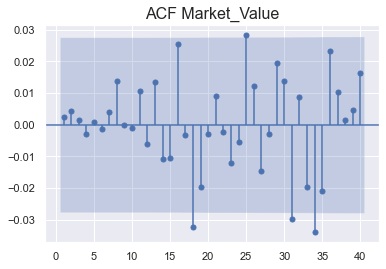

In [140]:
sgt.plot_acf(df.res_price,lags=40,zero=False)
plt.title("ACF Market_Value", size=16)
plt.show()

In [132]:
df.head()

,market_value,returns,norm,norm_ret,res_price
date,,,,,
1994-01-10,3440.58,-0.156704,100.000000,100.000000,-0.175618
1994-01-11,3413.77,-0.779229,99.220771,497.260711,-0.802193
1994-01-12,3372.02,-1.222988,98.007313,780.443046,-1.270024
1994-01-13,3360.01,-0.356166,97.658244,227.285567,-0.466062
1994-01-14,3400.56,1.206842,98.836824,-770.139292,1.061277


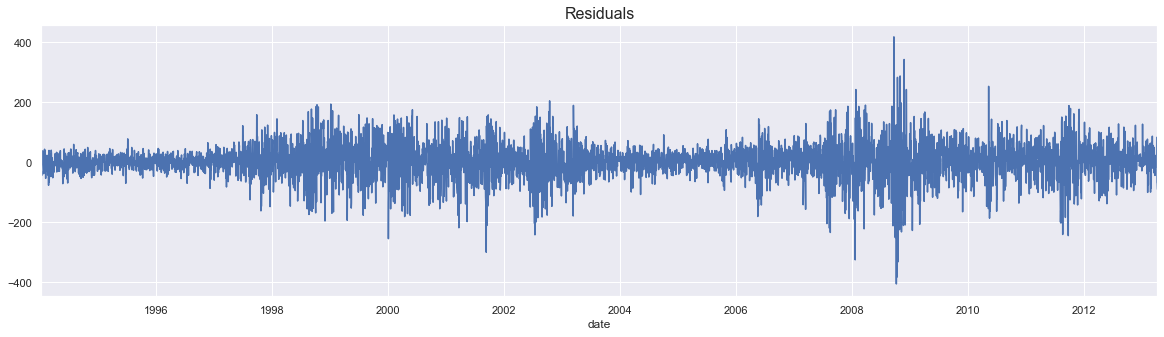

In [141]:
#
df.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals",size=16)
plt.show()

In [142]:
# Analyzing the residuals

df['res_ret'] = results_ret_ar_6.resid

In [143]:
df.res_ret.mean(), df.res_ret.var()

(-5.3753378245979546e-05, 1.355980211069491)

In [144]:
sts.adfuller(df.res_ret)

(-70.78379951416683,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15692.570834279846)

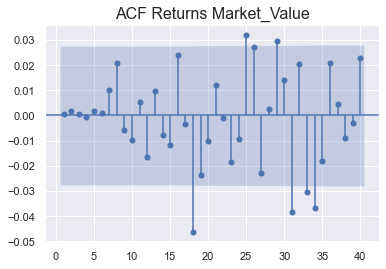

In [145]:
sgt.plot_acf(df.res_ret,lags=40,zero=False)
plt.title("ACF Returns Market_Value", size=16)
plt.show()